In [1]:
import tensorflow as tf 
import numpy as np

import matplotlib.pyplot as plt  

from tensorflow.keras import models, layers

%load_ext tensorboard

In [2]:
#Data input pipeline and data preprocessing

img_size=200
batch_size=32
num_channels=3
dt=tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Dev Projects/AI_Projects/Blood Smear Code/cell_images/Train',
    shuffle=True,
    batch_size=batch_size,
    image_size=(img_size, img_size),
   
  
)

Found 100 files belonging to 2 classes.


In [3]:
#Class names

class_names=dt.class_names

print(class_names)
print(len(dt))




['Parasitized', 'Uninfected']
4


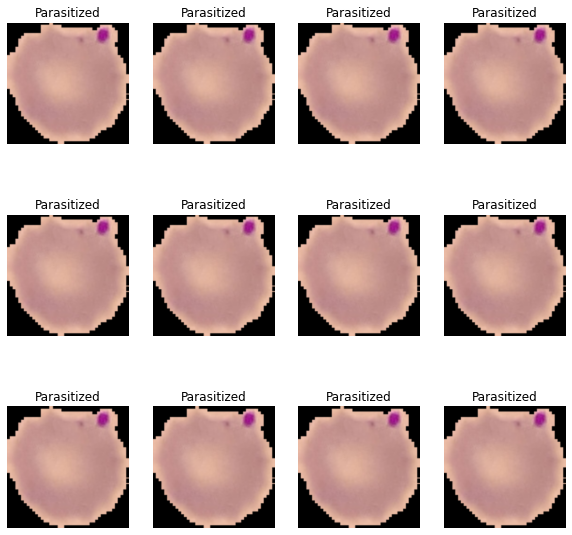

In [4]:
#displaying sample imgs
plt.figure(figsize=(10,10))
for img_batch, label_batch in dt.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(img_batch[0].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[0]])

In [5]:
#function to split the dataset into train and testing
def split_dt(ds,train_split=0.70, test_split=0.30, shuffle=True, shuffle_size=1000):
     assert(train_split + test_split)==1
     
     ds_size=len(ds)
     
     if shuffle:
         ds=ds.shuffle(shuffle_size, seed=12)
     train_size=int(train_split* ds_size)
     test_size=int(test_split* ds_size)
     
     train_ds= ds.take(train_size)
     test_ds= ds.take(test_size)
     
     return train_ds, test_ds

In [6]:
train_ds, test_ds=split_dt(dt)


In [7]:
print(len(train_ds))
print(len(test_ds))

2
1


In [8]:
#Building the model

#This neural network accepts images of 200 by 200
#the resize_to_rescale function serves purpose for image resizing or rescaling

resize_rescale= tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(img_size, img_size),
        layers.experimental.preprocessing.Rescaling(1.0/200)
    ]
)


#model architechture
num_classes=2
channels=3
input_shape=(batch_size,img_size,img_size,channels)


model=models.Sequential(
    [
        resize_rescale,
        layers.Conv2D(16, kernel_size=(3,3),activation='relu',input_shape=input_shape),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
        
        
        
        
    ]
)

model.build(input_shape=input_shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 200, 200, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 198, 198, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 99, 99, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 97, 97, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 48, 48, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 46, 46, 32)         

In [10]:
#model compilation and training
import os
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    
   # tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=1)
)

model.fit(
    train_ds,
    epochs=20,
    batch_size=batch_size
    #callbacks=[tensorboard_callback]
   
    
)

Epoch 1/20
2/2 [==============================] - 2s 471ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 1s 489ms/step - loss: 0.6977 - accuracy: 0.4167
Epoch 3/20
2/2 [==============================] - 1s 547ms/step - loss: 0.6923 - accuracy: 0.4688
Epoch 4/20
2/2 [==============================] - 1s 465ms/step - loss: 0.6894 - accuracy: 0.5278
Epoch 5/20
2/2 [==============================] - 1s 426ms/step - loss: 0.6841 - accuracy: 0.5781
Epoch 6/20
2/2 [==============================] - 1s 76ms/step - loss: 0.6884 - accuracy: 0.4167
Epoch 7/20
2/2 [==============================] - 1s 449ms/step - loss: 0.6771 - accuracy: 0.5833
Epoch 8/20
2/2 [==============================] - 1s 443ms/step - loss: 0.7017 - accuracy: 0.5156
Epoch 9/20
2/2 [==============================] - 1s 67ms/step - loss: 0.7258 - accuracy: 0.4444
Epoch 10/20
2/2 [==============================] - 1s 432ms/step - loss: 0.6824 - accuracy: 0.4722
Epoch 11/20
2/2 [====

In [11]:
#saving the model

model.save('./smear_analyser_tf_model')

INFO:tensorflow:Assets written to: ./smear_analyser_tf_model\assets


In [12]:
from PIL import Image
from tensorflow import keras


def predict_img(img_pth):
    print(" Image Prediction in progress")
    image_dt=Image.open(img_pth)
    
    
    
    img=tf.keras.preprocessing.image.img_to_array(image_dt)
    
    
    img=np.expand_dims(img, axis=0)
    
    #making predictions on input image
    
    pred=model.predict(img)
    pred=pred.argmax(axis=1)[0]
    
    if (pred==0):
        ans=print(" Positive for malaria")
    elif(pred==1):
        ans=print("Negative for malaria")
    
    return ans
    
    
    
    

In [13]:
def load_img(image):
    image=Image.open(image)
    return image

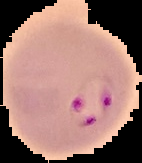

In [14]:
load_img('D:/Dev Projects/AI_Projects/Blood Smear Code/cell_images/Train/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png')

In [15]:
predict_img('D:/Dev Projects/AI_Projects/Blood Smear Code/cell_images/Train/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png')

 Image Prediction in progress
 Positive for malaria


In [ ]:
mdt=predict_img('D:/Dev Projects/AI_Projects/Blood Smear Code/cell_images/Train/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png')

if (mdt==0):
    print("Positive for malaria")
elif (mdt==1):
    print("Negative for malaria")

 Image Prediction in progress
Positive for malaria
